In [21]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [22]:
type(data)

dict

In [23]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
try:
    df = pd.json_normalize(data['data'])
    timestamp = pd.to_datetime('now', utc=True).strftime('%Y-%m-%d %H:%M:%S')

    df['timestamp'] = timestamp
    df
except Exception as e:
    print(f"Error: {e}")


In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10166,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19349825.00000,19349825.00000,False,NaN,1,None,None,None,2023-04-18T15:45:00.000Z,30167.25480,18233974897.87975,0.43920,-0.31689,2.90922,-0.08544,9.48522,24.78490,41.35322,583731101072.96436,45.83710,633512350759.35999,None,2023-04-18T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 15:47:35
1,1027,Ethereum,ETH,ethereum,6737,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,119368246.22832,119368246.22832,False,NaN,2,None,None,None,2023-04-18T15:45:00.000Z,2095.50867,8682304352.29487,-20.16630,-0.20168,1.26798,9.53958,16.71462,25.06294,32.45473,250137194561.61417,19.62300,250137194561.60999,None,2023-04-18T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 15:47:35
2,825,Tether,USDT,tether,51414,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81061272678.94568,84091735571.79916,False,NaN,3,None,None,None,2023-04-18T15:45:00.000Z,1.00041,31211000622.29745,-6.88110,0.01019,0.01771,-0.03617,-0.25013,0.02457,0.02890,81094581488.69151,6.36790,84126289626.14000,None,2023-04-18T15:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 15:47:35
3,1839,BNB,BNB,bnb,1266,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865288.70075,155865288.70075,False,NaN,4,None,None,None,2023-04-18T15:45:00.000Z,342.95362,733241785.85800,-23.56620,-0.13901,1.24330,4.08949,0.78164,10.16753,14.38583,53454565688.84717,4.19710,53454565688.85000,None,2023-04-18T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 15:47:35
4,3408,USD Coin,USDC,usd-coin,11865,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31568061529.09266,31568061529.09266,False,NaN,5,None,None,None,2023-04-18T15:45:00.000Z,1.00002,3978454011.17212,-20.73670,0.01741,0.04419,0.01917,0.00746,-0.02440,0.02481,31568779794.72785,2.47870,31568779794.73000,None,2023-04-18T15:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 15:47:35
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,None,None,None,2023-04-18T15:45:00.000Z,0.52035,1013654189.17268,4.67530,-0.05445,2.11134,0.31727,32.38619,33.40626,32.70123,26928600085.76779,2.11250,52035127351.77000,None,2023-04-18T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 15:47:35
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34780385919.73600,35694617077.12100,False,NaN,7,None,None,None,2023-04-18T15:45:00.000Z,0.44186,335633765.88340,-32.10650,-0.26373,1.67365,8.83464,27.28217,10.07826,26.24566,15368229314.91076,1.20680,19883917354.08000,None,2023-04-18T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 15:47:35
7,74,Dogecoin,DOGE,dogecoin,688,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138990226383.70523,138990226383.70523,False,NaN,8,None,None,None,2023-04-18T15:45:00.000Z,0.09445,794161198.58233,-40.98330,1.18736,4.01397,11.32305,25.73322,8.44662,7.46625,13127350864.50668,1.03140,13127350864.51000,None,2023-04-18T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 15:47:3

In [26]:
import os


def api_runner():
    import datetime
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    timestamp = datetime.datetime.utcnow()
    df2['API Pull Timestamp'] = timestamp
    df = pd.concat([df, df2], ignore_index=True)

    if not os.path.isfile('./crypto.csv'):
       df.to_csv('./crypto.csv',header='column_names')
    else:
       df.to_csv('./crypto.csv', mode='a', header = FALSE)   
       


In [27]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) 
exit()

NameError: name 'FALSE' is not defined

In [28]:
import pandas as pd

try:
    crypto_df = pd.read_csv('./crypto.csv')
except FileNotFoundError:
    print("Error: CSV file not found.")


In [29]:
crypto_df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,API Pull Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19349668.00000,19349668.00000,False,NaN,1,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,29961.31204,17489309739.35549,11.90040,0.10703,0.33834,-0.52233,10.36278,25.98155,41.31661,579741440859.30920,45.61170,629187552884.40002,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
1,1,1027,Ethereum,ETH,ethereum,6736,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119368246.22832,119368246.22832,False,NaN,2,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,2103.04856,9244151139.63105,-1.91570,-0.11888,0.70096,9.50177,18.05574,26.14597,33.44520,251037218077.33850,19.74920,251037218077.34000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
2,2,825,Tether,USDT,tether,51396,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81061272678.94568,84091735571.79916,False,NaN,3,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,1.00037,31075849170.11152,5.57680,-0.00216,-0.03108,-0.03912,-0.23209,0.01741,0.02556,81091605534.42668,6.38000,84123202416.30000,NaN,2023-04-18T11:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 11:26:30,NaN
3,3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865411.21123,155865411.21123,False,NaN,4,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,343.94513,771499712.38114,-28.87600,-0.05146,0.58773,4.15169,2.07075,10.82864,14.37082,53609149690.61084,4.21400,53609149690.61000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
4,4,3408,USD Coin,USDC,usd-coin,11857,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31614523186.92815,31614523186.92815,False,NaN,5,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.99995,4004911109.51742,-10.64000,-0.00519,0.00724,-0.00493,0.00957,-0.02306,0.00333,31612856321.93082,2.48490,31612856321.93000,NaN,2023-04-18T11:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 11:26:30,NaN
5,5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.51755,958594677.65653,10.44960,0.17641,0.68287,-0.99823,32.64456,33.28710,32.77326,26783761381.14309,2.10710,51755250179.67000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
6,6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34779735908.08600,35694617077.12100,False,NaN,7,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.44428,397513634.02677,-6.22210,0.14218,-0.08761,8.57036,29.98519,12.39240,28.09503,15451832640.36037,1.21570,19992459708.54000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
7,7,74,Dogecoin,DOGE,dogecoin,688,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138987986383.70523,138987986383.70523,False,NaN,8,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.09304,1057864890.45739,6.77970,-0.05652,-1.24985,8.98933,25.51214,7.40391,8.03023,12930892335.78136,1.01720,12930892335.78000,NaN,2023-04-18T11:25:00

In [30]:
crypto_df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,API Pull Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19349668.00000,19349668.00000,False,NaN,1,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,29961.31204,17489309739.35549,11.90040,0.10703,0.33834,-0.52233,10.36278,25.98155,41.31661,579741440859.30920,45.61170,629187552884.40002,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
1,1,1027,Ethereum,ETH,ethereum,6736,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119368246.22832,119368246.22832,False,NaN,2,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,2103.04856,9244151139.63105,-1.91570,-0.11888,0.70096,9.50177,18.05574,26.14597,33.44520,251037218077.33850,19.74920,251037218077.34000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
2,2,825,Tether,USDT,tether,51396,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81061272678.94568,84091735571.79916,False,NaN,3,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,1.00037,31075849170.11152,5.57680,-0.00216,-0.03108,-0.03912,-0.23209,0.01741,0.02556,81091605534.42668,6.38000,84123202416.30000,NaN,2023-04-18T11:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 11:26:30,NaN
3,3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865411.21123,155865411.21123,False,NaN,4,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,343.94513,771499712.38114,-28.87600,-0.05146,0.58773,4.15169,2.07075,10.82864,14.37082,53609149690.61084,4.21400,53609149690.61000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
4,4,3408,USD Coin,USDC,usd-coin,11857,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31614523186.92815,31614523186.92815,False,NaN,5,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.99995,4004911109.51742,-10.64000,-0.00519,0.00724,-0.00493,0.00957,-0.02306,0.00333,31612856321.93082,2.48490,31612856321.93000,NaN,2023-04-18T11:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 11:26:30,NaN
5,5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.51755,958594677.65653,10.44960,0.17641,0.68287,-0.99823,32.64456,33.28710,32.77326,26783761381.14309,2.10710,51755250179.67000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
6,6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34779735908.08600,35694617077.12100,False,NaN,7,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.44428,397513634.02677,-6.22210,0.14218,-0.08761,8.57036,29.98519,12.39240,28.09503,15451832640.36037,1.21570,19992459708.54000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
7,7,74,Dogecoin,DOGE,dogecoin,688,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138987986383.70523,138987986383.70523,False,NaN,8,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.09304,1057864890.45739,6.77970,-0.05652,-1.24985,8.98933,25.51214,7.40391,8.03023,12930892335.78136,1.01720,12930892335.78000,NaN,2023-04-18T11:25:00

In [31]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)
crypto_df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,API Pull Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10165,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19349668.00000,19349668.00000,False,NaN,1,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,29961.31204,17489309739.35549,11.90040,0.10703,0.33834,-0.52233,10.36278,25.98155,41.31661,579741440859.30920,45.61170,629187552884.40002,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
1,1,1027,Ethereum,ETH,ethereum,6736,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,119368246.22832,119368246.22832,False,NaN,2,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,2103.04856,9244151139.63105,-1.91570,-0.11888,0.70096,9.50177,18.05574,26.14597,33.44520,251037218077.33850,19.74920,251037218077.34000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
2,2,825,Tether,USDT,tether,51396,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81061272678.94568,84091735571.79916,False,NaN,3,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,1.00037,31075849170.11152,5.57680,-0.00216,-0.03108,-0.03912,-0.23209,0.01741,0.02556,81091605534.42668,6.38000,84123202416.30000,NaN,2023-04-18T11:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-18 11:26:30,NaN
3,3,1839,BNB,BNB,bnb,1265,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865411.21123,155865411.21123,False,NaN,4,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,343.94513,771499712.38114,-28.87600,-0.05146,0.58773,4.15169,2.07075,10.82864,14.37082,53609149690.61084,4.21400,53609149690.61000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
4,4,3408,USD Coin,USDC,usd-coin,11857,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31614523186.92815,31614523186.92815,False,NaN,5,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.99995,4004911109.51742,-10.64000,-0.00519,0.00724,-0.00493,0.00957,-0.02306,0.00333,31612856321.93082,2.48490,31612856321.93000,NaN,2023-04-18T11:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-18 11:26:30,NaN
5,5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.51755,958594677.65653,10.44960,0.17641,0.68287,-0.99823,32.64456,33.28710,32.77326,26783761381.14309,2.10710,51755250179.67000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
6,6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34779735908.08600,35694617077.12100,False,NaN,7,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.44428,397513634.02677,-6.22210,0.14218,-0.08761,8.57036,29.98519,12.39240,28.09503,15451832640.36037,1.21570,19992459708.54000,NaN,2023-04-18T11:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-18 11:26:30,NaN
7,7,74,Dogecoin,DOGE,dogecoin,688,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138987986383.70523,138987986383.70523,False,NaN,8,NaN,NaN,NaN,2023-04-18T11:25:00.000Z,0.09304,1057864890.45739,6.77970,-0.05652,-1.24985,8.98933,25.51214,7.40391,8.03023,12930892335.78136,1.01720,12930892335.78000,NaN,2023-04-18T11:25:00

In [32]:
import pandas as pd
grouped_df = crypto_df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
grouped_df

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10703,0.33834,-0.52233,10.36278,25.98155,41.31661
Ethereum,-0.11888,0.70096,9.50177,18.05574,26.14597,33.44520
Tether,-0.00216,-0.03108,-0.03912,-0.23209,0.01741,0.02556
BNB,-0.05146,0.58773,4.15169,2.07075,10.82864,14.37082
USD Coin,-0.00519,0.00724,-0.00493,0.00957,-0.02306,0.00333
XRP,0.17641,0.68287,-0.99823,32.64456,33.28710,32.77326
Cardano,0.14218,-0.08761,8.57036,29.98519,12.39240,28.09503
Dogecoin,-0.05652,-1.24985,8.98933,25.51214,7.40391,8.03023
Polygon,0.10996,0.77702,4.37659,-0.67354,-19.14857,19.19587


In [33]:
df4 = grouped_df.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.10703
             quote.USD.percent_change_24h     0.33834
             quote.USD.percent_change_7d     -0.52233
             quote.USD.percent_change_30d    10.36278
             quote.USD.percent_change_60d    25.98155
             quote.USD.percent_change_90d    41.31661
Ethereum     quote.USD.percent_change_1h     -0.11888
             quote.USD.percent_change_24h     0.70096
             quote.USD.percent_change_7d      9.50177
             quote.USD.percent_change_30d    18.05574
             quote.USD.percent_change_60d    26.14597
             quote.USD.percent_change_90d    33.44520
Tether       quote.USD.percent_change_1h     -0.00216
             quote.USD.percent_change_24h    -0.03108
             quote.USD.percent_change_7d     -0.03912
             quote.USD.percent_change_30d    -0.23209
             quote.USD.percent_change_60d     0.01741
             quote.USD.percent_change_90

In [34]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.10703
            quote.USD.percent_change_24h   0.33834
            quote.USD.percent_change_7d   -0.52233
            quote.USD.percent_change_30d  10.36278
            quote.USD.percent_change_60d  25.98155
            quote.USD.percent_change_90d  41.31661
Ethereum    quote.USD.percent_change_1h   -0.11888
            quote.USD.percent_change_24h   0.70096
            quote.USD.percent_change_7d    9.50177
            quote.USD.percent_change_30d  18.05574
            quote.USD.percent_change_60d  26.14597
            quote.USD.percent_change_90d  33.44520
Tether      quote.USD.percent_change_1h   -0.00216
            quote.USD.percent_change_24h  -0.03108
            quote.USD.percent_change_7d   -0.03912
            quote.USD.percent_change_30d  -0.23209
            quote.USD.percent_change_60d   0.01741
            quote.USD.percent_change_90d   0.02556
BNB         quote.USD.percent_change_1h   -0.05146
            quote.USD.percent_change_24h   0.58773
            quote.USD.percent_change_7d    4.15169
            quote.USD.percent_change_30d   2.07075
            quote.USD.percent_change_60d  10.82864
            quote.USD.percent_change_90d  14.37082
USD Coin    quote.USD.percent_change_1h   -0.00519
            quote.USD.percent_change_24h   0.00724
            quote.USD.percent_change_7d   -0.00493
            quote.USD.percent_change_30d   0.00957
            quote.USD.percent_change_60d  -0.02306
            quote.USD.percent_change_90d   0.00333
XRP         quote.USD.percent_change_1h    0.17641
            quote.USD.percent_change_24h   0.68287
            quote.USD.percent_change_7d   -0.99823
            quote.USD.percent_change_30d  32.64456
            quote.USD.percent_change_60d  33.28710
            quote.USD.percent_change_90d  32.77326
Cardano     quote.USD.percent_change_1h    0.14218
            quote.USD.percent_change_24h  -0.08761
            quote.USD.percent_change_7d    8.57036
            quote.USD.percent_change_30d  29.98519
            quote.USD.percent_change_60d  12.39240
            quote.USD.percent_change_90d  28.09503
Dogecoin    quote.USD.percent_change_1h   -0.05652
            quote.USD.percent_change_24h  -1.24985
            quote.USD.percent_change_7d    8.98933
            quote.USD.percent_change_30d  25.51214
            quote.USD.percent_change_60d   7.40391
            quote.USD.percent_change_90d   8.03023
Polygon     quote.USD.percent_change_1h    0.10996
            quote.USD.percent_change_24h   0.77702
            quote.USD.percent_change_7d    4.37659
            quote.USD.percent_change_30d  -0.67354
            quote.USD.percent_change_60d -19.14857
            quote.USD.percent_change_90d  19.19587
Solana      quote.USD.percent_change_1h   -0.18054
            quote.USD.percent_change_24h   0.73612
            quote.USD.percent_change_7d   12.56133
            quote.USD.percent_change_30d  16.96580
            quote.USD.percent_change_60d  11.42041
            quote.USD.percent_change_90d  11.85025
Polkadot    quote.USD.percent_change_1h    0.38665
            quote.USD.percent_change_24h   3.55306
            quote.USD.percent_change_7d    8.04802
            quote.USD.percent_change_30d   8.00564
            quote.USD.percent_change_60d   2.65557
            quote.USD.percent_change_90d  17.23520
Litecoin    quote.USD.percent_change_1h   -0.09624
            quote.USD.percent_change_24h   3.27851
            quote.USD.percent_change_7d    6.77266
            quote.USD.percent_change_30d  22.57618
            quote.USD.percent_change_60d   2.32758
            quote.USD.percent_change_90d  18.34827
Avalanche   quote.USD.percent_change_1h    0.02425
            quote.USD.percent_change_24h   4.68761
            quote.USD.percent_change_7d   16.32032
            quote.USD.percent_change_30d  22.33971
            quote.USD.percent_change_60d  11.98210
            quo

In [42]:
print(df5.columns)


Index(['values'], dtype='object')


In [43]:
df5.count()

values    90
dtype: int64

In [46]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10703
1,Bitcoin,quote.USD.percent_change_24h,0.33834
2,Bitcoin,quote.USD.percent_change_7d,-0.52233
3,Bitcoin,quote.USD.percent_change_30d,10.36278
4,Bitcoin,quote.USD.percent_change_60d,25.98155
5,Bitcoin,quote.USD.percent_change_90d,41.31661
6,Ethereum,quote.USD.percent_change_1h,-0.11888
7,Ethereum,quote.USD.percent_change_24h,0.70096
8,Ethereum,quote.USD.percent_change_7d,9.50177
9,Ethereum,quote.USD.percent_change_30d,18.05574


In [48]:
df7 = df6.rename(columns={'level_1':'Percent_Change'})
df7

,name,Percent_Change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10703
1,Bitcoin,quote.USD.percent_change_24h,0.33834
2,Bitcoin,quote.USD.percent_change_7d,-0.52233
3,Bitcoin,quote.USD.percent_change_30d,10.36278
4,Bitcoin,quote.USD.percent_change_60d,25.98155
5,Bitcoin,quote.USD.percent_change_90d,41.31661
6,Ethereum,quote.USD.percent_change_1h,-0.11888
7,Ethereum,quote.USD.percent_change_24h,0.70096
8,Ethereum,quote.USD.percent_change_7d,9.50177
9,Ethereum,quote.USD.percent_change_30d,18.05574


In [50]:
df7['Percent_Change'] = df7['Percent_Change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,Percent_Change,values
0,Bitcoin,1h,0.10703
1,Bitcoin,24h,0.33834
2,Bitcoin,7d,-0.52233
3,Bitcoin,30d,10.36278
4,Bitcoin,60d,25.98155
5,Bitcoin,90d,41.31661
6,Ethereum,1h,-0.11888
7,Ethereum,24h,0.70096
8,Ethereum,7d,9.50177
9,Ethereum,30d,18.05574


In [52]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/293.3 kB 1.3 MB/s eta 0:00:01
     ----- ------------------------------- 41.0/293.3 kB 487.6 kB/s eta 0:00:01
     --------- --------------------------- 71.7/293.3 kB 653.6 kB/s eta 0:00:01
     --------------- -------------------- 122.9/293.3 kB 654.9 kB/s eta 0:00:01
     ------------------ ----------------- 153.6/293.3 kB 654.6 kB/s eta 0:00:01
     ----------------------- ------------ 194.6/293.3 kB 692.9 kB/s eta 0:00:01
     --------------------------- -------- 225.3/293.3 kB 724.0 kB/s eta 0:00:01
     ------------------------------- ---- 256.0/293.3 kB 714.4 kB/s eta 0:00:01
     -----------------------------------  286.7/293.3 kB 707.1 kB/s eta 0:00:01
     ------------------------------------ 293.3/293.3 kB 646.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 M

In [53]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


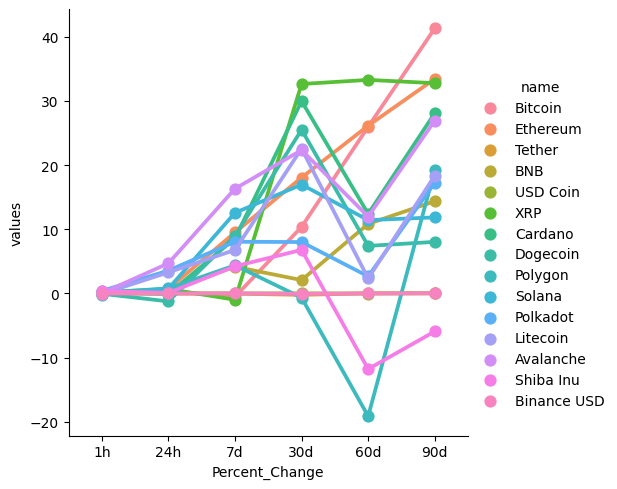

In [54]:
import seaborn as sns
import matplotlib as plt 
sns.catplot(x='Percent_Change',y='values',hue='name',data=df7,kind='point')

In [58]:
df10=df[['name','quote.USD.price','timestamp']]
df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30167.25480,2023-04-18 15:47:35
1,Ethereum,2095.50867,2023-04-18 15:47:35
2,Tether,1.00041,2023-04-18 15:47:35
3,BNB,342.95362,2023-04-18 15:47:35
4,USD Coin,1.00002,2023-04-18 15:47:35
5,XRP,0.52035,2023-04-18 15:47:35
6,Cardano,0.44186,2023-04-18 15:47:35
7,Dogecoin,0.09445,2023-04-18 15:47:35
8,Polygon,1.16790,2023-04-18 15:47:35
9,Solana,24.96288,2023-04-18 15:47:35


In [60]:
sns.set_theme(style="darkgrid")


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

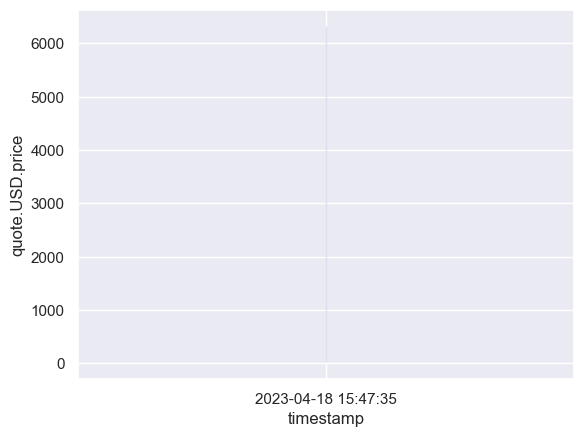

In [62]:
sns.lineplot(x='timestamp',y='quote.USD.price',data = df10)